# Домашняя работа. Деревья решений.

## Полезная литература

- [Habrahabr: ODS деревья решений](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy)
- [ВМК МГУ семинары по решающим деревьям](99-extra__ml-course-msu-Sem04_trees.pdf)
- [Sklearn Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

## 1. Сравнение моделей деревьев

В этом блоке вы сравните разные конфигурации композиций деревьев:
- DecisionTree
- Bagging
- Bagging с другими настройками подбора признаков для разбиения
- RandomForest

Будем использовать [датасет с винишком](https://archive.ics.uci.edu/ml/datasets/wine+quality) - это задача то ли классификации то ли регресси - нужно предсказывать качество вина. Будем думать что это классификация.

![](https://upload.wikimedia.org/wikipedia/en/thumb/7/7c/Lulz_Security.svg/300px-Lulz_Security.svg.png)

### 1.1 Чтение данных (1 балла)

Данные лежат как обычно в `'./data/winequality-red.csv.gz'`.

- Прочитайте их с помощью pandas
- нарисуйте countplot целевого признака `quality`.
- Что вы думаете по поводу количества представителей каждого класса.
- Разбейте данные на X и y.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_digits
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [34]:
data = pd.read_csv('winequality-red.csv', sep=';')
print(data.head())
print("\nНазвания столбцов:")
print(data.columns)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

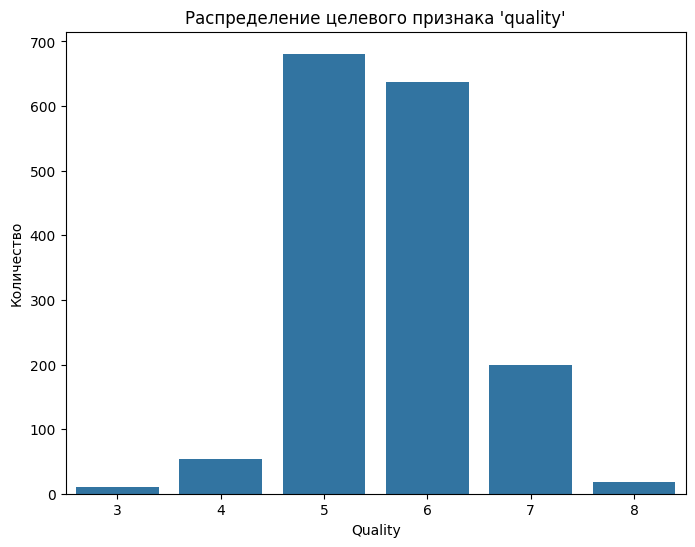

Количество представителей каждого класса:
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title("Распределение целевого признака 'quality'")
plt.xlabel("Quality")
plt.ylabel("Количество")
plt.show()
print("Количество представителей каждого класса:")
print(data['quality'].value_counts())
X = data.drop(columns=['quality'])
y = data['quality']

### 1.2 Сравнение моделей (4 балла)

Задача классификации. Все признаки уже числовые. Значит можно пробовать просто все модели и выбрать лучшую. Так и поступим, сделайте кросс валидацию на 5 фолдах, используя `sklearn.model_selection.KFold` как аргумент у `cross_val_score`. Метрика качества будет `accuracy`.

Алгоритмы для тестирования:
- KNeighborsClassifier с 10 соседями
- KNeighborsClassifier с 10 соседями и масштабированием StandartScaler
- RidgeClassifier
- DecisionTreeClassifier
- BaggingClassifier c 100 деревьев
- BaggingClassifier с 100 деревьев и каждое дерево обучается только по половине случайно выбранных признаков (см аргументы)
- RandomForestClassifier c 100 деревьев

Выведите среднее значение метрики качества для каждого из классификаторов.

**hint**: каждый следующий алгоритм, будет показывать качество лучше, чем предыдущий. Если у вас не так - то что-то вы делаете неправильно. Везде зафиксируйте random_state=42.

In [36]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

cv = KFold(n_splits=5, random_state=42, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=10)
scores_knn = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
print("KNeighborsClassifier с 10 соседями: {:.6f}, Std: {:.6f}".format(scores_knn.mean(), scores_knn.std()))

KNeighborsClassifier с 10 соседями: 0.512220, Std: 0.026461


In [37]:
pipeline_knn_scaled = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))
scores_knn_scaled = cross_val_score(pipeline_knn_scaled, X, y, cv=cv, scoring='accuracy')
print("KNeighborsClassifier с 10 соседями и масштабированием StandartScaler: {:.6f}, Std: {:.6f}".format(scores_knn_scaled.mean(), scores_knn_scaled.std()))

KNeighborsClassifier с 10 соседями и масштабированием StandartScaler: 0.581634, Std: 0.019192


In [38]:
ridge = RidgeClassifier(random_state=42)
scores_ridge = cross_val_score(ridge, X, y, cv=cv, scoring='accuracy')
print("RidgeClassifier: {:.6f}, Std: {:.6f}".format(scores_ridge.mean(), scores_ridge.std()))

RidgeClassifier: 0.583538, Std: 0.039966


In [39]:
decision_tree = DecisionTreeClassifier(random_state=42)
scores_decision_tree = cross_val_score(decision_tree, X, y, cv=cv, scoring='accuracy')
print("DecisionTreeClassifier: {:.6f}, Std: {:.6f}".format(scores_decision_tree.mean(), scores_decision_tree.std()))

DecisionTreeClassifier: 0.617896, Std: 0.033631


In [40]:
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)
scores_bagging = cross_val_score(bagging, X, y, cv=cv, scoring='accuracy')
print("BaggingClassifier c 100 деревьев: {:.6f}, Std: {:.6f}".format(scores_bagging.mean(), scores_bagging.std()))

BaggingClassifier c 100 деревьев: 0.697966, Std: 0.035447


In [41]:
bagging_half_features = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, max_features=0.5, random_state=42)
scores_bagging_half_features = cross_val_score(bagging_half_features, X, y, cv=cv, scoring='accuracy')
print("BaggingClassifier с 100 деревьев и каждое дерево обучается только по половине случайно выбранных признаков: {:.6f}, Std: {:.6f}".format(scores_bagging_half_features.mean(), scores_bagging_half_features.std()))

BaggingClassifier с 100 деревьев и каждое дерево обучается только по половине случайно выбранных признаков: 0.694835, Std: 0.022539


In [42]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
scores_random_forest = cross_val_score(random_forest, X, y, cv=cv, scoring='accuracy')
print("RandomForestClassifier c 100 деревьев: {:.6f}, Std: {:.6f}".format(scores_random_forest.mean(), scores_random_forest.std()))

RandomForestClassifier c 100 деревьев: 0.701714, Std: 0.028722


### 1.3 Расуждения (8 баллов)

Ответьте на вопросы развернуто, можете полистать литературу:

- почему наблюдается значимая разница в качестве у KNeighborsClassifier с масштабированием и без: KNeighborsClassifier зависит от масштабов признаков, потому что для его работы используется вычисление расстояний между объектами. Если признаки имеют разные масштабы, признаки с большими значениями могут оказывать более сильное влияние на результат, затмевая признаки с меньшими значениями, что снижает точность модели. Масштабирование помогает каждому признаку вносить равный вклад в расчет расстояний, что улучшает качество классификации.
- почему масштабирование не важно для деревьев решений:
Деревья решений не зависят от масштаба признаков, поскольку они строят модель, основываясь на пороговых значениях каждого признака. Так как выбор порогов происходит независимо от масштабов признаков, изменение масштаба не влияет на структуру дерева и, соответственно, не сказывается на его эффективности.
- почему бэггинг на половине признаков для каждого дерева дал качество предсказания больше, чем на всех? (а он дал!): Бэггинг с использованием случайных подмножеств признаков может улучшить качество предсказаний по нескольким причинам:
Снижение корреляции между деревьями: Обучение на разных подмножествах признаков делает деревья менее зависимыми друг от друга, что улучшает общее качество предсказания при агрегации.
Снижение переобучения: Использование подмножества признаков помогает избежать переобучения на шумных или нерелевантных признаках, улучшая обобщающую способность модели.
Игнорирование нерелевантных признаков: Случайный выбор признаков снижает вероятность того, что модель будет использовать неважные признаки, улучшая точность.
Ускорение вычислений: Обучение на меньшем числе признаков сокращает время обучения и повышает эффективность.
- у какой модели наибольшей отклонение от среднего качества предсказаний? А почему??

## 2 Переобучение и Ко

В последнем задании вы уже заметили, что случайный лес может вести себя немного нестабильно. В этом задании мы возьмем опять датасет MNIST(простите) и будем его решать деревьями. Почему мы взяли его? Потому что в нем фактически много разных признаков (значения пикселей в пространстве), а деревья строятся делая разбиения по признакам. Обычно на эти разбиения не обращают внимание, так как главное что тюнят - это глубина дереьвев, количество деревьев, а кучу других параметров обходят стороной, так как они "неясные". Попробуем прояснить их.

### 2.1 Загрузка датасета (1 балл)

Загрузите датасет с помощью функции `sklearn.datasets.load_digits`. В нем будут 64px картинки в векторной форме.

Нарисуйте первые 10 цифр в одной ячейке, чтобы было красиво.

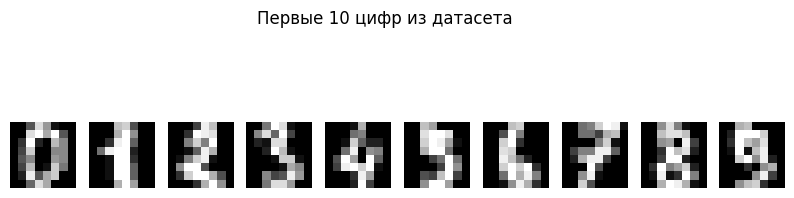

In [43]:
digits = load_digits()
plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.axis('off')
plt.suptitle("Первые 10 цифр из датасета")
plt.show()

### 2.2 Перебор классификаторов (3 балла)

В этом задании вам снова придется перебрать несколько классификаторов, но теперь мы обратим внимание на другие гиперпараметры и их влияние на качество классификации, кстати опять `accuracy`.

Сделайте кроссвалидацию на 10 фолдах, указав `cv=10` для следующих классификаторов:

- DecisionTreeClassifier с параметрами по-умолчанию
- BaggingClassifier с 100 деревьвев
- BaggingClassifier с 100 деревьев, НО с ограничением на максимальное количество признаков, участвующих при обучении каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков.
- BaggingClassifier с 100 деревьев, НО с ограничением на количество признаков участвующих в разбиении для каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков. Это отличается от предыдущей модели тем, где ограничивается `max_features`. Читайте документацию :trollface:
- обычный случайный лес со 100 деревьями

In [44]:
decision_tree = DecisionTreeClassifier(random_state=42)
scores_decision_tree = cross_val_score(decision_tree, X, y, cv=10, scoring='accuracy')
print("DecisionTreeClassifier с параметрами по-умолчанию:", scores_decision_tree.mean())

DecisionTreeClassifier с параметрами по-умолчанию: 0.4777830188679245


In [45]:
bagging = BaggingClassifier(n_estimators=100, random_state=42)
scores_bagging = cross_val_score(bagging, X, y, cv=10, scoring='accuracy')
print("BaggingClassifier с 100 деревьев:", scores_bagging.mean())

BaggingClassifier с 100 деревьев: 0.5578301886792453


In [46]:
num_features = X.shape[1]
bagging_max_features = BaggingClassifier(n_estimators=100, max_features=int(np.sqrt(num_features)), random_state=42)
scores_bagging_max_features = cross_val_score(bagging_max_features, X, y, cv=10, scoring='accuracy')
print("BaggingClassifier с 100 деревьев, НО с ограничением на максимальное количество признаков", scores_bagging_max_features.mean())

Среднее значение accuracy для BaggingClassifier с 100 деревьями и ограничением на max_features: 0.5603380503144655


In [47]:
bagging_split_features = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_features=int(np.sqrt(num_features)), random_state=42),
    n_estimators=100,
    random_state=42
)
scores_bagging_split_features = cross_val_score(bagging_split_features, X, y, cv=10, scoring='accuracy')
print("BaggingClassifier с 100 деревьев, НО с ограничением на количество признаков участвующих в разбиении для каждого из деревьев:", scores_bagging_split_features.mean())

Среднее значение accuracy для BaggingClassifier с 100 деревьями и ограничением max_features в разбиениях деревьев: 0.5697366352201257


In [48]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
scores_random_forest = cross_val_score(random_forest, X, y, cv=10, scoring='accuracy')
print("обычный случайный лес со 100 деревьями:", scores_random_forest.mean())

Среднее значение accuracy для RandomForestClassifier с 100 деревьями: 0.5734905660377358


### 2.3 В чём разница? (3 балла)

Ответье на вопрос:

Странно то как? Почему ограничение на количество признаков в разбиении дерева и ограничение в количестве признаков для построения каждого дерева в BaggingClasifier дало СОВСЕМ разный результат в качестве предсказания? В чем магия?
- Ограничение числа признаков на уровне разбиений (в каждом узле) увеличивает случайность и разнообразие внутри каждого дерева, что способствует улучшению обобщающих способностей ансамбля. В то же время ограничение числа признаков для каждого дерева уменьшает количество доступной информации, что снижает качество, так как деревья становятся менее информативными.

### 2.4 Количество деревьев (2 балла)

Сделайте перебор количества деревьев для `RandomForestClassifier`. Сохраните качества кросс валидации на 10 фолдах для `[1,5,10,15,50,100,150,200,300]` количества деревьев. Нарисуйте график, где по оси x - количество деревьев, а по оси y - качество. При каком количестве деревьев получается самое хорошее качество?

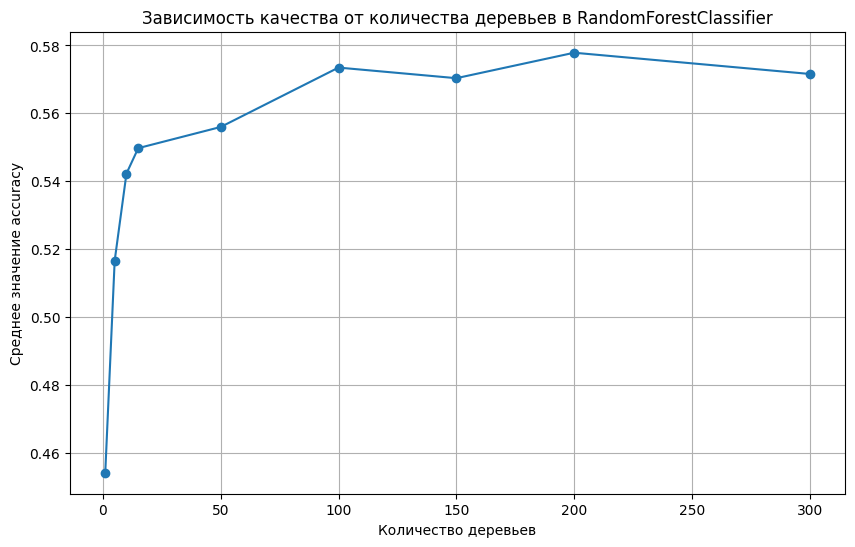

Оптимальное количество деревьев: 200, при котором accuracy = 0.5778694968553459


In [49]:
n_estimators_options = [1, 5, 10, 15, 50, 100, 150, 200, 300]
mean_accuracies = []
for n in n_estimators_options:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
    mean_accuracies.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_options, mean_accuracies, marker='o')
plt.xlabel("Количество деревьев")
plt.ylabel("Среднее значение accuracy")
plt.title("Зависимость качества от количества деревьев в RandomForestClassifier")
plt.grid(True)
plt.show()

best_n_estimators = n_estimators_options[np.argmax(mean_accuracies)]
best_accuracy = max(mean_accuracies)
print(f"Оптимальное количество деревьев: {best_n_estimators}, при котором accuracy = {best_accuracy}")

### 2.5 Количество признаков  (2 балла)

Переберите теперь максимальное количество признаков для `RandomForestClassifier` на 100 деревьях, от 1 до 64 с шагом 5. Постройте график качества по кроссвалидации на 10 фолдах.

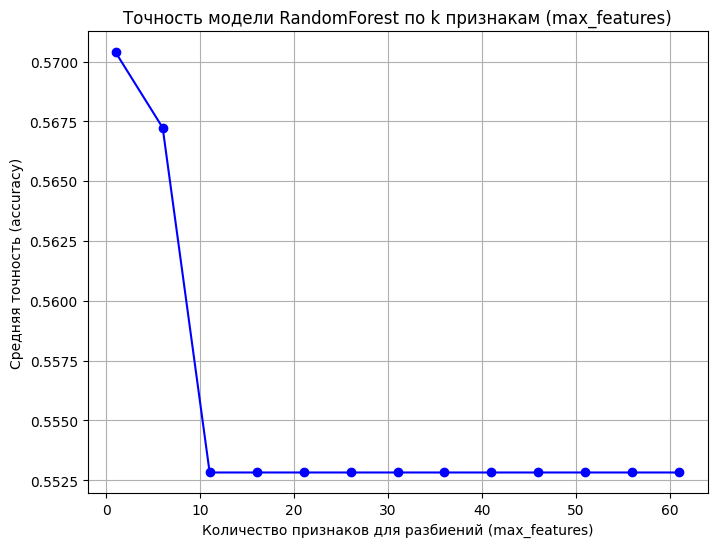

In [50]:
max_features_range = np.arange(1, 65, 5)
mean_accuracies = []

for max_features in max_features_range:
    rf = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=42)

    scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')

    mean_accuracies.append(scores.mean())

plt.figure(figsize=(8, 6))
plt.plot(max_features_range, mean_accuracies, marker='o', linestyle='-', color='b')
plt.title('Точность модели RandomForest по k признакам (max_features)')
plt.xlabel('Количество признаков для разбиений (max_features)')
plt.ylabel('Средняя точность (accuracy)')
plt.grid(True)
plt.show()


### 2.5 Вопросы по RandomForest (8 баллов)

Ответьте на вопросы:

- Что происходит с ростом числа деревьев у случайного леса. Можно ли просто всегда брать 5000 деревьев и быть счастливым?
Рост числа деревьев в случайном лесе обычно повышает стабильность и точность модели, так как ансамбль становится более устойчивым к случайным колебаниям в данных. Однако, после определенного количества деревьев, преимущество от добавления новых деревьев уменьшается. Это связано с тем, что увеличивая количество деревьев после определенного числа, вы просто тратите вычислительные ресурсы, не улучшая существенно результат.
- Как зависит качество предсказания в дереве в зависимости от max_features?
Качество предсказания в дереве зависит от параметра max_features, который определяет, сколько признаков доступно для выбора на каждом разбиении в дереве. Когда количество признаков, доступных для разбиения, ограничено, деревья становятся более случайными, что увеличивает разнообразие среди деревьев в ансамбле и способствует лучшему обобщению модели. Однако слишком малое значение max_features может привести к тому, что дерево будет слишком ограничено в своем обучении и не сможет извлечь достаточно информации из данных. С другой стороны, если количество признаков для разбиений слишком велико, деревья становятся менее случайными, что может привести к их избыточной адаптации к данным и снижению способности модели обобщать.
- Почему качество зависит от max_features?
Качество модели в случайном лесе зависит от параметра max_features, потому что этот параметр контролирует количество признаков, которые используются для разбиений в каждом дереве. Он влияет на разнообразие деревьев и их способность обобщать данные.
- Как глубина деревьев влияет на качество случайного леса?
Очень глубокие деревья могут переобучиться, так как они слишком точно подстраиваются под обучающие данные, включая шум и случайные вариации. В то время как слишком поверхностные деревья не будут способны выявить важные закономерности и подойдут к обучению слишком абстрактно, что приведет к недообучению. Таким образом, важно настроить глубину деревьев так, чтобы она была достаточно большой для того, чтобы модель могла захватить важные зависимости, но при этом не слишком большой, чтобы избежать переобучения.

![](https://habrastorage.org/web/ad8/366/a44/ad8366a4469346c6b2e1306495b05d1a.jpg)